In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
PROJECT_DIR = Path('/net/projects/veitch/prompt_distributions/')
RESULTS_DIR = PROJECT_DIR / 'results/'
FIGURES_DIR = PROJECT_DIR / 'figures/'
results_file = 'sft_experiment_results_gpt2_20240518_103825.json'

In [4]:
with open(RESULTS_DIR / results_file) as f:
    data = json.load(f)

In [5]:
data[0]

{'edited_interventional_likelihood': -952.8365478515625,
 'edited_conditional_likelihood': -792.2217407226562,
 'unedited_interventional_likelihood': -929.69482421875,
 'unedited_conditional_likelihood': -771.905029296875,
 'test_statistic': -2.82501220703125}

In [6]:
test_statistics = [entry['test_statistic'] for entry in data]
unedited_i_over_c = [entry['unedited_interventional_likelihood'] - entry['unedited_conditional_likelihood'] for entry in data]
edited_i_over_c = [entry['edited_interventional_likelihood'] - entry['edited_conditional_likelihood'] for entry in data]
edited_over_unedited_i = [entry['edited_interventional_likelihood'] - entry['unedited_interventional_likelihood'] for entry in data]
edited_over_unedited_c = [entry['edited_conditional_likelihood'] - entry['unedited_conditional_likelihood'] for entry in data]

In [7]:
df = pd.DataFrame({
    'test_statistic': test_statistics, 
    'unedited_i_over_c': unedited_i_over_c, 
    'edited_i_over_c': edited_i_over_c, 
    'edited_over_unedited_i': edited_over_unedited_i, 
    'edited_over_unedited_c': edited_over_unedited_c
})

In [8]:
df['test_statistic'].mean()

-22.98000717163086

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


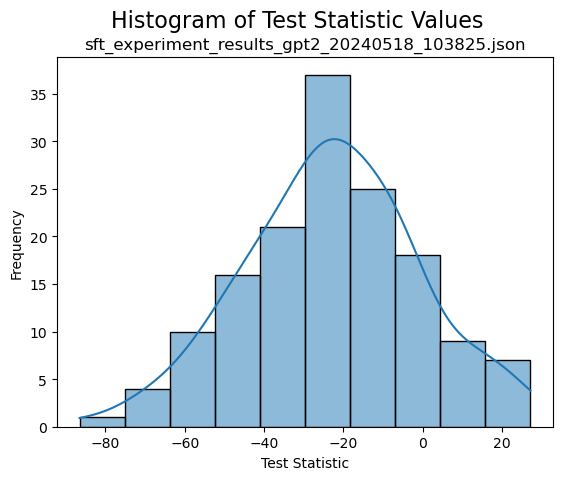

In [9]:
sns.histplot(df['test_statistic'], bins=10, kde=True)
plt.suptitle('Histogram of Test Statistic Values', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Test Statistic')
plt.ylabel('Frequency')
plt.savefig(FIGURES_DIR / f'test_statistic_histogram_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


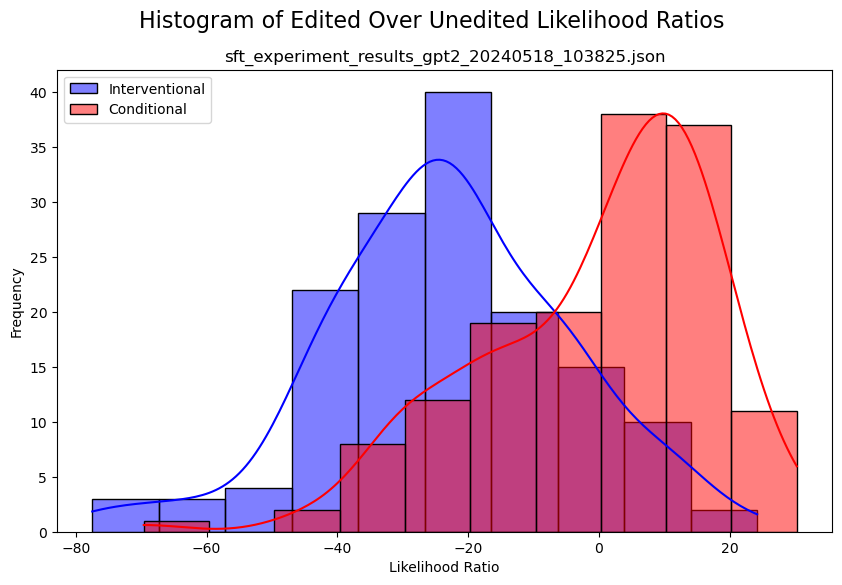

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(df['edited_over_unedited_i'], bins=10, kde=True, color='blue', label='Interventional')
sns.histplot(df['edited_over_unedited_c'], bins=10, kde=True, color='red', label='Conditional')

plt.suptitle('Histogram of Edited Over Unedited Likelihood Ratios', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(FIGURES_DIR / f'edited_over_unedited_histogram_{results_file}.png', dpi=300)

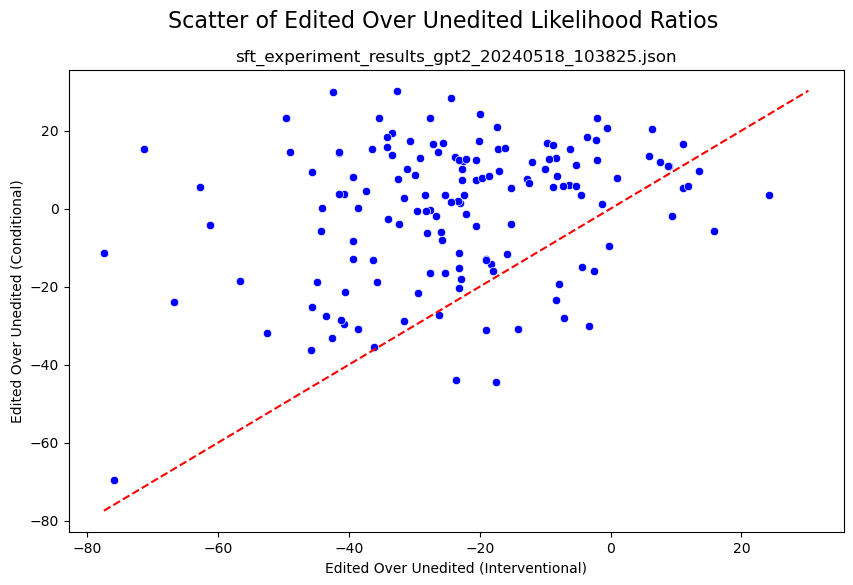

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edited_over_unedited_i', y='edited_over_unedited_c', data=df, marker='o', color='blue')
# add identity line
plt.plot([min(edited_over_unedited_i), max(edited_over_unedited_c)], [min(edited_over_unedited_i), max(edited_over_unedited_c)], 'r--')

plt.suptitle('Scatter of Edited Over Unedited Likelihood Ratios', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Edited Over Unedited (Interventional)')
plt.ylabel('Edited Over Unedited (Conditional)')
plt.savefig(FIGURES_DIR / f'edited_over_unedited_scatter_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


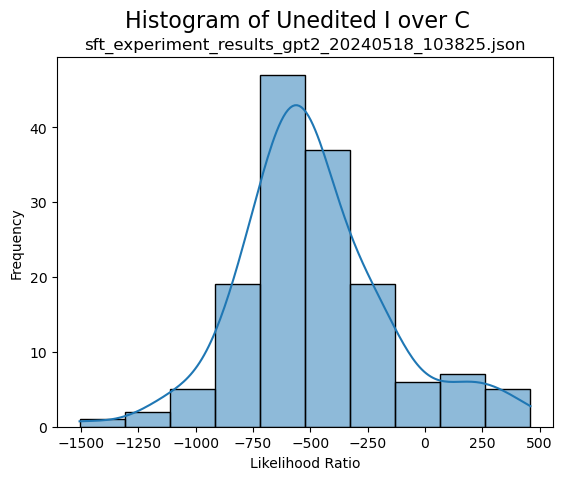

In [12]:
sns.histplot(df['unedited_i_over_c'], bins=10, kde=True)
plt.suptitle('Histogram of Unedited I over C', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frequency')
plt.savefig(FIGURES_DIR / f'unedited_i_over_c_histogram_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


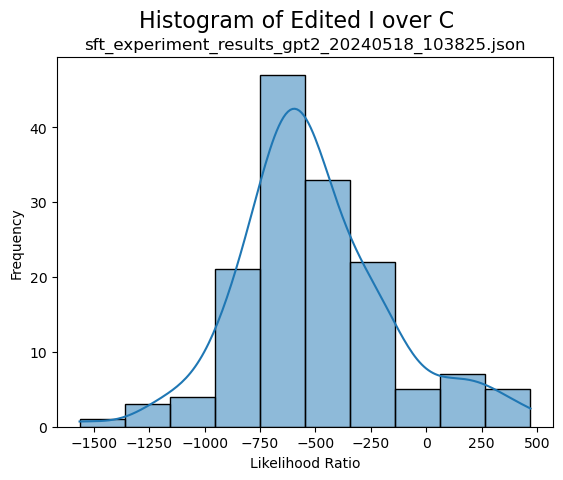

In [13]:
sns.histplot(df['edited_i_over_c'], bins=10, kde=True)
plt.suptitle('Histogram of Edited I over C', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frequency')
plt.savefig(FIGURES_DIR / f'edited_i_over_c_histogram_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


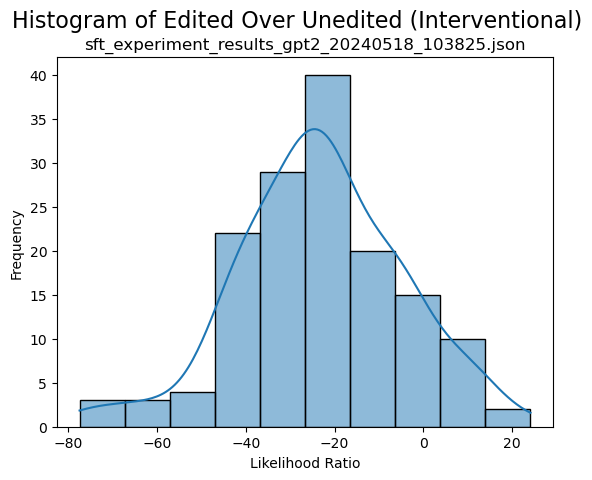

In [14]:
sns.histplot(df['edited_over_unedited_i'], bins=10, kde=True)
plt.suptitle('Histogram of Edited Over Unedited (Interventional)', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frequency')
plt.savefig(FIGURES_DIR / f'edited_over_unedited_i_histogram_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


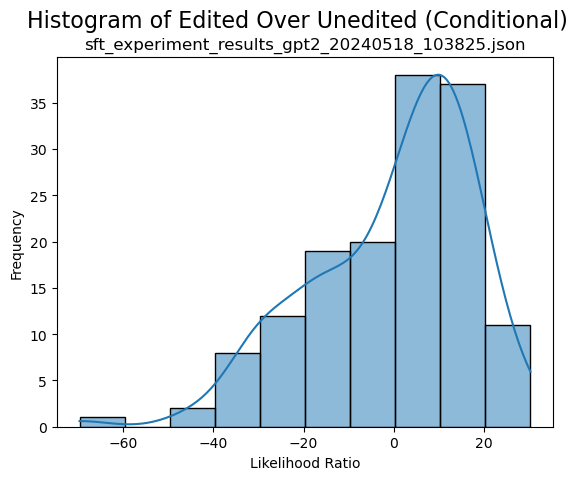

In [15]:
sns.histplot(df['edited_over_unedited_c'], bins=10, kde=True)
plt.suptitle('Histogram of Edited Over Unedited (Conditional)', fontsize=16)
plt.title(results_file, fontsize=12)
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frequency')
plt.savefig(FIGURES_DIR / f'edited_over_unedited_c_histogram_{results_file}.png', dpi=300)
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


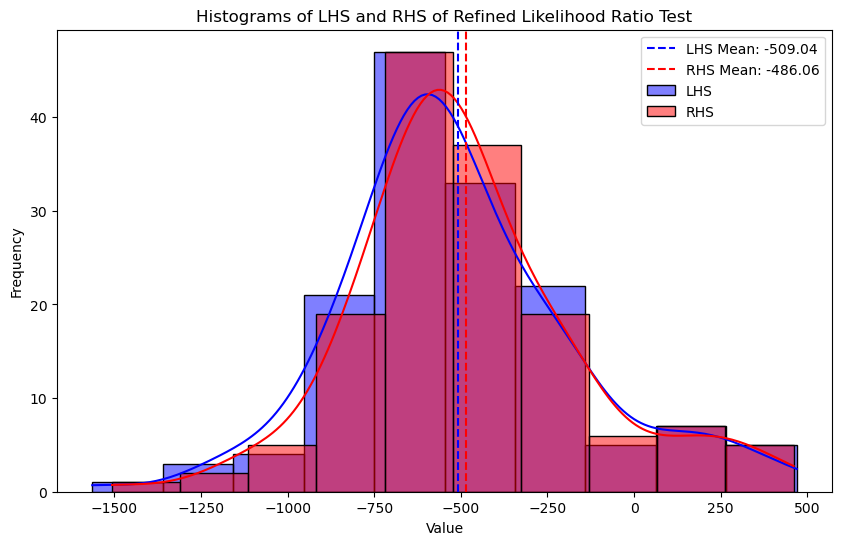

In [16]:
lhs_values = [
    entry['edited_interventional_likelihood'] - entry['edited_conditional_likelihood']
    for entry in data
]
rhs_values = [entry['unedited_interventional_likelihood'] - entry['unedited_conditional_likelihood'] for entry in data]


df = pd.DataFrame({'lhs': lhs_values, 'rhs': rhs_values})


plt.figure(figsize=(10, 6))

sns.histplot(df['lhs'], bins=10, kde=True, color='blue', label='LHS')
sns.histplot(df['rhs'], bins=10, kde=True, color='red', label='RHS')

# Add vertical dashed lines for means
lhs_mean = df['lhs'].mean()
rhs_mean = df['rhs'].mean()
plt.axvline(lhs_mean, color='blue', linestyle='--', label=f'LHS Mean: {lhs_mean:.2f}')
plt.axvline(rhs_mean, color='red', linestyle='--', label=f'RHS Mean: {rhs_mean:.2f}')

# Set titles and labels
plt.title('Histograms of LHS and RHS of Refined Likelihood Ratio Test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Save the figure
# plt.savefig('lhs_rhs_histograms.png', dpi=300)

# Show the plot
plt.show()

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lhs', ylabel='Count'>

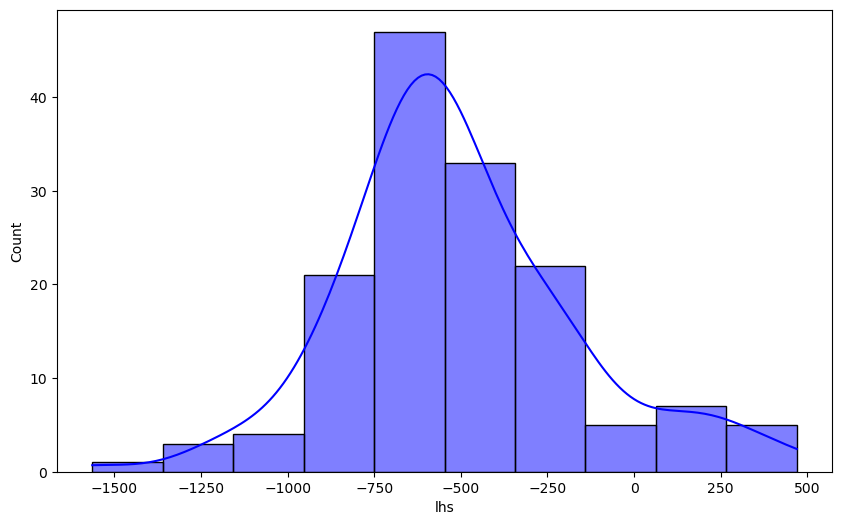

In [17]:
lhs_values = [
    entry['edited_interventional_likelihood'] - entry['edited_conditional_likelihood']
    for entry in data
]
rhs_values = [entry['unedited_interventional_likelihood'] - entry['unedited_conditional_likelihood'] for entry in data]


df = pd.DataFrame({'lhs': lhs_values, 'rhs': rhs_values})


plt.figure(figsize=(10, 6))

sns.histplot(df['lhs'], bins=10, kde=True, color='blue', label='LHS')

/net/projects/clab/tnief/conda/envs/llm-steering/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rhs', ylabel='Count'>

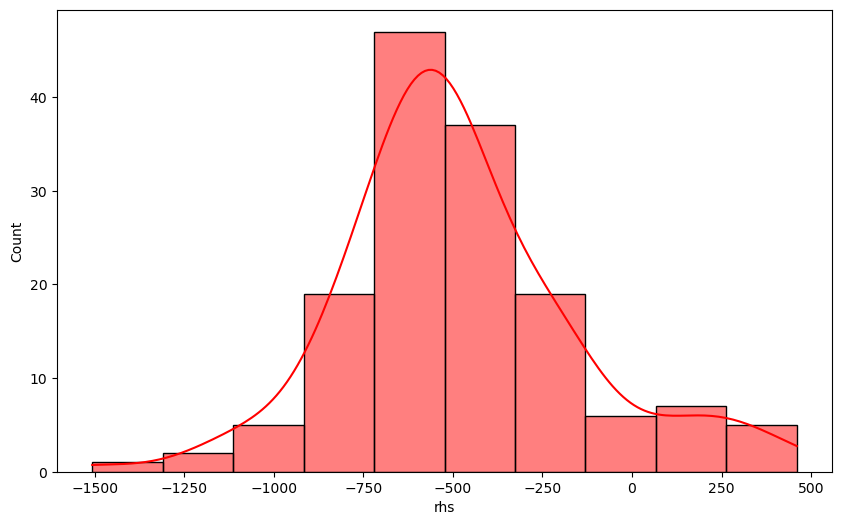

In [18]:
lhs_values = [
    entry['edited_interventional_likelihood'] - entry['edited_conditional_likelihood']
    for entry in data
]
rhs_values = [entry['unedited_interventional_likelihood'] - entry['unedited_conditional_likelihood'] for entry in data]


df = pd.DataFrame({'lhs': lhs_values, 'rhs': rhs_values})


plt.figure(figsize=(10, 6))

sns.histplot(df['rhs'], bins=10, kde=True, color='red', label='RHS')

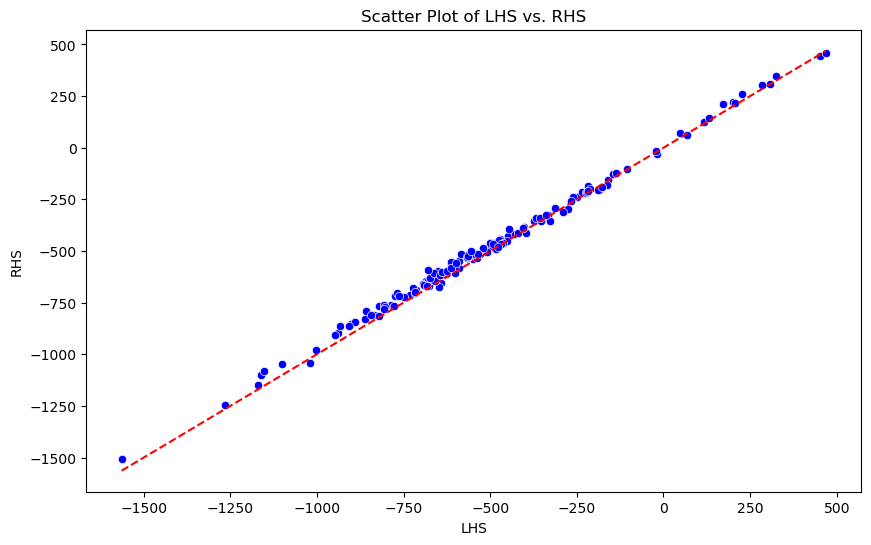

In [19]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lhs', y='rhs', data=df, marker='o', color='blue')

# Add identity line (y=x)
plt.plot([min(lhs_values), max(lhs_values)], [min(lhs_values), max(lhs_values)], 'r--')

# Add titles and labels
plt.title('Scatter Plot of LHS vs. RHS')
plt.xlabel('LHS')
plt.ylabel('RHS')

# Save the figure
plt.savefig('lhs_rhs_scatterplot.png', dpi=300)

# Show the plot
plt.show()